In [145]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.compat.v1 as v1
import matplotlib.pyplot as plt 
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.graph_objs import Line
import datetime

# import raw data - apple stock

In [146]:
# Setting the dates and tickers for feature selection 
start_date = '2011-01-01'
end_date = '2021-06-15'
bitcoin_ticker = 'BTC-USD'
apple_ticker = 'AAPL'
tesla_ticker = 'TSLA'
#miscrosof_ticker = 'MSFT'
#amazon_ticker = 'DOGE-USD'
#alphabet_ticker = 'DOGE-USD'
#facebook_ticker = 'FB'

In [147]:
apple = yf.download(apple_ticker, 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,11.533929,11.552857,11.475357,11.520000,9.906079,193508000
2011-01-03,11.630000,11.795000,11.601429,11.770357,10.121364,445138400
2011-01-04,11.872857,11.875000,11.719643,11.831786,10.174186,309080800
2011-01-05,11.769643,11.940714,11.767857,11.928571,10.257413,255519600
2011-01-06,11.954286,11.973214,11.889286,11.918929,10.249121,300428800
...,...,...,...,...,...,...
2021-06-08,126.599998,128.460007,126.209999,126.739998,126.739998,74403800
2021-06-09,127.209999,127.750000,126.519997,127.129997,127.129997,56877900
2021-06-10,127.019997,128.190002,125.940002,126.110001,126.110001,71186400


In [148]:
apple.shape

(2630, 6)

In [149]:
apple.info

<bound method DataFrame.info of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-12-31   11.533929   11.552857   11.475357   11.520000    9.906079   
2011-01-03   11.630000   11.795000   11.601429   11.770357   10.121364   
2011-01-04   11.872857   11.875000   11.719643   11.831786   10.174186   
2011-01-05   11.769643   11.940714   11.767857   11.928571   10.257413   
2011-01-06   11.954286   11.973214   11.889286   11.918929   10.249121   
...                ...         ...         ...         ...         ...   
2021-06-08  126.599998  128.460007  126.209999  126.739998  126.739998   
2021-06-09  127.209999  127.750000  126.519997  127.129997  127.129997   
2021-06-10  127.019997  128.190002  125.940002  126.110001  126.110001   
2021-06-11  126.529999  127.440002  126.099998  127.349998  127.349998   
2021-06-14  127.820000  130.539993  127.070000  130.479996  130.479996   

     

In [150]:
apple.describe

<bound method NDFrame.describe of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-12-31   11.533929   11.552857   11.475357   11.520000    9.906079   
2011-01-03   11.630000   11.795000   11.601429   11.770357   10.121364   
2011-01-04   11.872857   11.875000   11.719643   11.831786   10.174186   
2011-01-05   11.769643   11.940714   11.767857   11.928571   10.257413   
2011-01-06   11.954286   11.973214   11.889286   11.918929   10.249121   
...                ...         ...         ...         ...         ...   
2021-06-08  126.599998  128.460007  126.209999  126.739998  126.739998   
2021-06-09  127.209999  127.750000  126.519997  127.129997  127.129997   
2021-06-10  127.019997  128.190002  125.940002  126.110001  126.110001   
2021-06-11  126.529999  127.440002  126.099998  127.349998  127.349998   
2021-06-14  127.820000  130.539993  127.070000  130.479996  130.479996   

   

In [151]:
fig = make_subplots(rows=4, cols=1,subplot_titles=('Open','High','Low','Adj Close'))
fig.add_trace(
    Line(x=apple.index, y=apple.Open),
    row=1, col=1
)
fig.add_trace(
    Line(x=apple.index, y=apple.High),
    row=2, col=1
)
fig.add_trace(
    Line(x=apple.index, y=apple.Low),
    row=3, col=1
)
fig.add_trace(
    go.Line(x=apple.index, y=apple.Close),
    row=4, col=1
)
fig.add_trace(
    go.Line(x=apple.index, y=apple.Volume),
    row=4, col=1
)
fig.update_layout(height=1200, width=800, title_text="Line Plots")
fig.show()
plt.savefig('dataset.png', dpi=300)

c:\users\pale\appdata\local\programs\python\python39\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




<Figure size 1080x576 with 0 Axes>

In [152]:
apple.rename(columns={"Close":"AAPL"}, inplace = True)
aapl = apple['AAPL']
aapl

Date
2010-12-31     11.520000
2011-01-03     11.770357
2011-01-04     11.831786
2011-01-05     11.928571
2011-01-06     11.918929
                 ...    
2021-06-08    126.739998
2021-06-09    127.129997
2021-06-10    126.110001
2021-06-11    127.349998
2021-06-14    130.479996
Name: AAPL, Length: 2630, dtype: float64

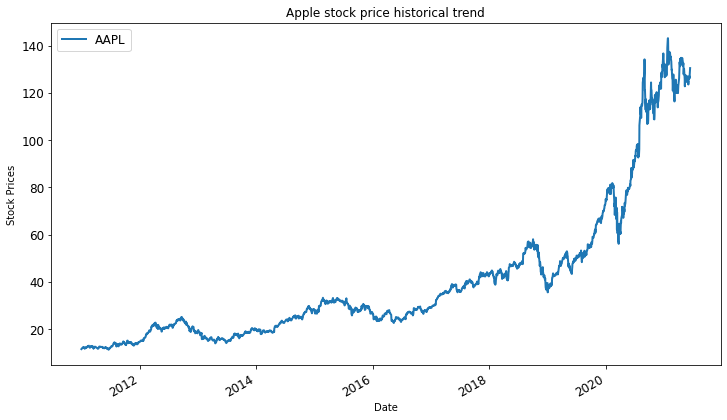

In [153]:
ax = aapl.plot(figsize=(12,7),linewidth=2, fontsize=12);
# Additional customizations
ax.set_title('Apple stock price historical trend')
ax.set_xlabel('Date');
ax.set_ylabel('Stock Prices');
ax.legend(fontsize=12);

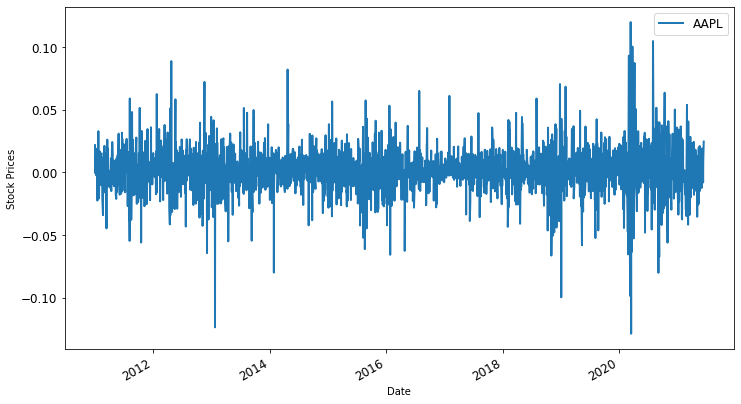

In [154]:
returns = aapl.pct_change()
ax = returns.plot(figsize=(12,7),linewidth=2, fontsize=12);
# Additional customizations
ax.set_xlabel('Date');
ax.set_ylabel('Stock Prices');
ax.legend(fontsize=12);

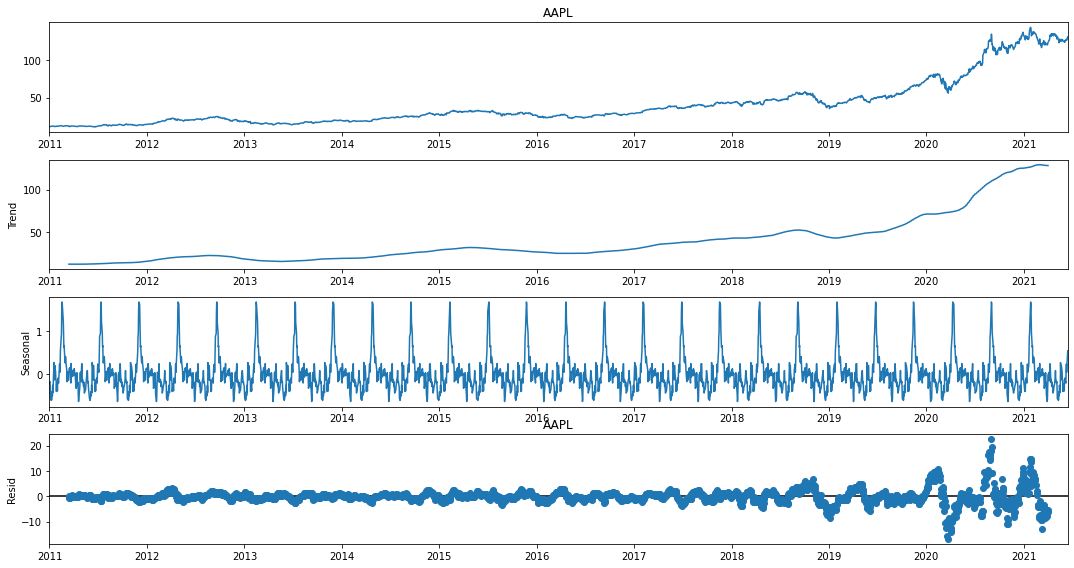

In [155]:
from statsmodels.tsa.seasonal import seasonal_decompose
result  = seasonal_decompose(pd.Series(aapl),period=100)
result.plot()
plt.title('AAPL')
plt.show()

# creating features

In [156]:
# Show rows and columns
print("Rows, Columns:");print(aapl.shape);print("\n")

Rows, Columns:
(2630,)




<h3> data normalization</h3>

In [157]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [158]:
#aapl.index = apple.index
aapl

Date
2010-12-31     11.520000
2011-01-03     11.770357
2011-01-04     11.831786
2011-01-05     11.928571
2011-01-06     11.918929
                 ...    
2021-06-08    126.739998
2021-06-09    127.129997
2021-06-10    126.110001
2021-06-11    127.349998
2021-06-14    130.479996
Name: AAPL, Length: 2630, dtype: float64

In [159]:
aapl = scaler.fit_transform(np.array(aapl).reshape(-1,1))
#DataScaler = scaler.fit(alpha)
#alpha=DataScaler.transform(alpha)
#X=FullData
aapl

array([[0.00196038],
       [0.00385848],
       [0.00432421],
       ...,
       [0.87073399],
       [0.88013513],
       [0.90386547]])

In [160]:
aapl.shape

(2630, 1)

<h3>Train Test split</h3>

In [161]:
#scaler=MinMaxScaler(feature_range=(0,1))
#aapl=aapl.values
training_size = int(len(aapl)*0.7)
test_size = len(aapl) - training_size
print('Training Size : ',training_size)
print('Test Size : ',test_size)

Training Size :  1840
Test Size :  790


In [162]:
train_data, test_data = aapl[0:training_size, :],aapl[training_size:len(aapl), :]
print('Training Data Shape : ', train_data.shape)
print('Test Data Shape: ', test_data.shape)

Training Data Shape :  (1840, 1)
Test Data Shape:  (790, 1)


In [163]:
#how many data points we are going to use to predict the next datapoint in the sequence. 
#Here I am taking 2 past values to predict a single value
def create_window(data , n_features):
    dataX, dataY = [], []
    for i in range(len(data)-n_features-1):
        a = data[i:(i+n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)

In [164]:
n_features = 2
X_train, y_train = create_window(train_data, n_features)
X_test, y_test = create_window(test_data, n_features)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1837, 2) (1837,)
(787, 2) (787,)


In [165]:
#Reshaping again for required LSTM input as (sample , timestamp , features per sample).
#Taking timestamp as 1.
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1837, 1, 2) (1837,)
(787, 1, 2) (787,)


### LSTM MODEL

In [166]:
#importing libraries
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Activation, LeakyReLU
from keras.layers import LSTM , GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam , SGD , RMSprop

In [167]:
filepath="stock_weights.hdf5"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_delta=0.0001, patience=1, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')

In [211]:
### Comparing different learning rates

In [208]:
lstm1 = Sequential()
lstm1.add(LSTM(50, input_shape = (1 , n_features), return_sequences = True))
lstm1.add(LSTM(50))
lstm1.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['accuracy'])
lstm1.compile(loss='mean_squared_error', optimizer=Adam(learning_rate = 0.005) , metrics = ['mean_squared_error'])

lstm_hist1 =lstm1.fit(X_train,y_train,validation_data = (X_test,y_test), epochs = 100,
                   batch_size=128,verbose=1)

Epoch 1/100
15/15 [==============================] - 50s 797ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.1355 - val_mean_squared_error: 0.1355
Epoch 2/100
15/15 [==============================] - 1s 48ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 3/100
15/15 [==============================] - 1s 51ms/step - loss: 7.6579e-04 - mean_squared_error: 7.6579e-04 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 4/100
15/15 [==============================] - 1s 50ms/step - loss: 1.5480e-04 - mean_squared_error: 1.5480e-04 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 5/100
15/15 [==============================] - 1s 46ms/step - loss: 3.3365e-05 - mean_squared_error: 3.3365e-05 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 6/100
15/15 [==============================] - 1s 51ms/step - loss: 1.7686e-05 - mean_squared_error: 1.7686e-05 - val_loss: 0.0047 - val_mean_squared_error: 0

In [209]:
def model_score(lstm1, X_train, y_train, X_test, y_test):
    trainScore = lstm1.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    testScore = lstm1.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

model_score(lstm1, X_train, y_train , X_test, y_test)

Train Score: 0.00001 MSE (0.00 RMSE)
Test Score: 0.00250 MSE (0.05 RMSE)


(1.1310722584312316e-05, 0.002496003173291683)

In [210]:
lstm2 = Sequential()
lstm2.add(LSTM(50, input_shape = (1 , n_features), return_sequences = True))
lstm2.add(LSTM(50))
lstm2.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['accuracy'])
lstm2.compile(loss='mean_squared_error', optimizer=Adam(learning_rate = 0.05) , metrics = ['mean_squared_error'])

lstm_hist2 =lstm2.fit(X_train,y_train,validation_data = (X_test,y_test), epochs = 100,
                   batch_size=128,verbose=1)

Epoch 1/100
15/15 [==============================] - 50s 648ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 2/100
15/15 [==============================] - 1s 39ms/step - loss: 9.5655e-04 - mean_squared_error: 9.5655e-04 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 3/100
15/15 [==============================] - 1s 35ms/step - loss: 1.7563e-04 - mean_squared_error: 1.7563e-04 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 4/100
15/15 [==============================] - 1s 37ms/step - loss: 3.5464e-05 - mean_squared_error: 3.5464e-05 - val_loss: 0.0371 - val_mean_squared_error: 0.0371
Epoch 5/100
15/15 [==============================] - 1s 40ms/step - loss: 1.7240e-05 - mean_squared_error: 1.7240e-05 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 6/100
15/15 [==============================] - 1s 36ms/step - loss: 1.4981e-05 - mean_squared_error: 1.4981e-05 - val_loss: 0.0346 - val_mean_squared_

In [212]:
def model_score(lstm2, X_train, y_train, X_test, y_test):
    trainScore = lstm2.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    testScore = lstm2.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

model_score(lstm2, X_train, y_train , X_test, y_test)

Train Score: 0.00002 MSE (0.00 RMSE)
Test Score: 0.02404 MSE (0.16 RMSE)


(1.6979369320324622e-05, 0.02404029294848442)

In [220]:
### Comapring different epochs

In [216]:
lstm3 = Sequential()
lstm3.add(LSTM(50, input_shape = (1 , n_features), return_sequences = True))
lstm3.add(LSTM(50))
lstm3.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['accuracy'])
lstm3.compile(loss='mean_squared_error', optimizer=Adam(learning_rate = 0.0005) , metrics = ['mean_squared_error'])

lstm_hist3 =lstm3.fit(X_train,y_train,validation_data = (X_test,y_test), epochs = 25,
                   batch_size=128,verbose=1)

Epoch 1/25
15/15 [==============================] - 47s 887ms/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.2629 - val_mean_squared_error: 0.2629
Epoch 2/25
15/15 [==============================] - 1s 42ms/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 3/25
15/15 [==============================] - 1s 41ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.1870 - val_mean_squared_error: 0.1870
Epoch 4/25
15/15 [==============================] - 1s 44ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.1563 - val_mean_squared_error: 0.1563
Epoch 5/25
15/15 [==============================] - 1s 40ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.1427 - val_mean_squared_error: 0.1427
Epoch 6/25
15/15 [==============================] - 1s 39ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.1323 - val_mean_squared_error: 0.1323
Epoch 7/25
15/15 [==============

In [218]:
def model_score(lstm3, X_train, y_train, X_test, y_test):
    trainScore = lstm3.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    testScore = lstm3.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

model_score(lstm3, X_train, y_train , X_test, y_test)

Train Score: 0.00001 MSE (0.00 RMSE)
Test Score: 0.00704 MSE (0.08 RMSE)


(1.2981300642422866e-05, 0.007044962607324123)

In [217]:
lstm4 = Sequential()
lstm4.add(LSTM(50, input_shape = (1 , n_features), return_sequences = True))
lstm4.add(LSTM(50))
lstm4.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['accuracy'])
lstm4.compile(loss='mean_squared_error', optimizer=Adam(learning_rate = 0.0005) , metrics = ['mean_squared_error'])

lstm_hist4 =lstm4.fit(X_train,y_train,validation_data = (X_test,y_test), epochs = 50,
                   batch_size=128,verbose=1)

Epoch 1/50
15/15 [==============================] - 67s 690ms/step - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.2529 - val_mean_squared_error: 0.2529
Epoch 2/50
15/15 [==============================] - 1s 37ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.2084 - val_mean_squared_error: 0.2084
Epoch 3/50
15/15 [==============================] - 1s 39ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.1674 - val_mean_squared_error: 0.1674
Epoch 4/50
15/15 [==============================] - 1s 94ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.1406 - val_mean_squared_error: 0.1406
Epoch 5/50
15/15 [==============================] - 1s 72ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.1305 - val_mean_squared_error: 0.1305
Epoch 6/50
15/15 [==============================] - 1s 88ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.1204 - val_mean_squared_error: 0.1204
Epoch 7/50
15/15 [==============

In [219]:
def model_score(lstm4, X_train, y_train, X_test, y_test):
    trainScore = lstm4.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    testScore = lstm4.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

model_score(lstm4, X_train, y_train , X_test, y_test)

Train Score: 0.00001 MSE (0.00 RMSE)
Test Score: 0.00442 MSE (0.07 RMSE)


(1.2623134352907073e-05, 0.004423665348440409)

In [168]:
lstm_model1 = Sequential()
lstm_model1.add(LSTM(50, input_shape = (1 , n_features), return_sequences = True))
lstm_model1.add(LSTM(50))
lstm_model1.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['accuracy'])
lstm_model1.compile(loss='mean_squared_error', optimizer=Adam(learning_rate = 0.0005) , metrics = ['mean_squared_error'])

lstm_history1 =lstm_model1.fit(X_train,y_train,validation_data = (X_test,y_test), epochs = 100,
                   batch_size=128,verbose=1)

Epoch 1/100
15/15 [==============================] - 69s 612ms/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.2534 - val_mean_squared_error: 0.2534
Epoch 2/100
15/15 [==============================] - 1s 35ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2109 - val_mean_squared_error: 0.2109
Epoch 3/100
15/15 [==============================] - 1s 42ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.1691 - val_mean_squared_error: 0.1691
Epoch 4/100
15/15 [==============================] - 0s 28ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.1392 - val_mean_squared_error: 0.1392
Epoch 5/100
15/15 [==============================] - 0s 26ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.1264 - val_mean_squared_error: 0.1264
Epoch 6/100
15/15 [==============================] - 1s 35ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.1187 - val_mean_squared_error: 0.1187
Epoch 7/100
15/15 [=======

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 1, 50)             10600     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 30,851
Trainable params: 30,851
Non-trainable params: 0
_________________________________________________________________


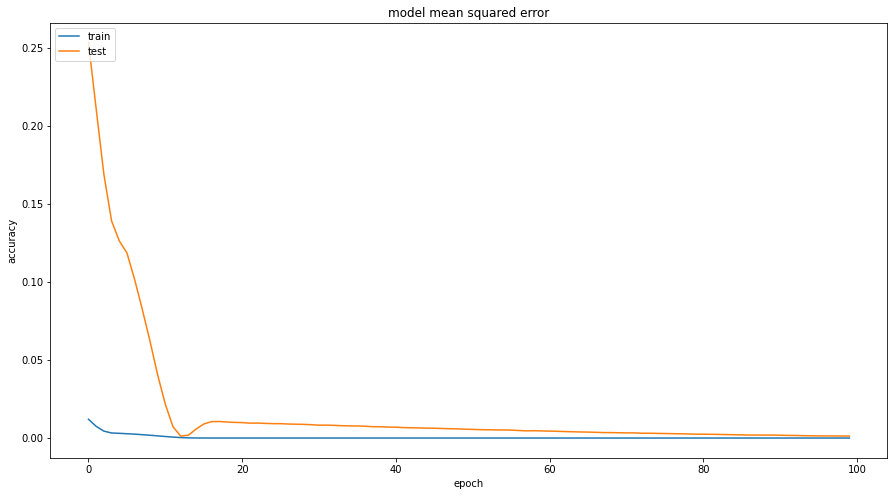

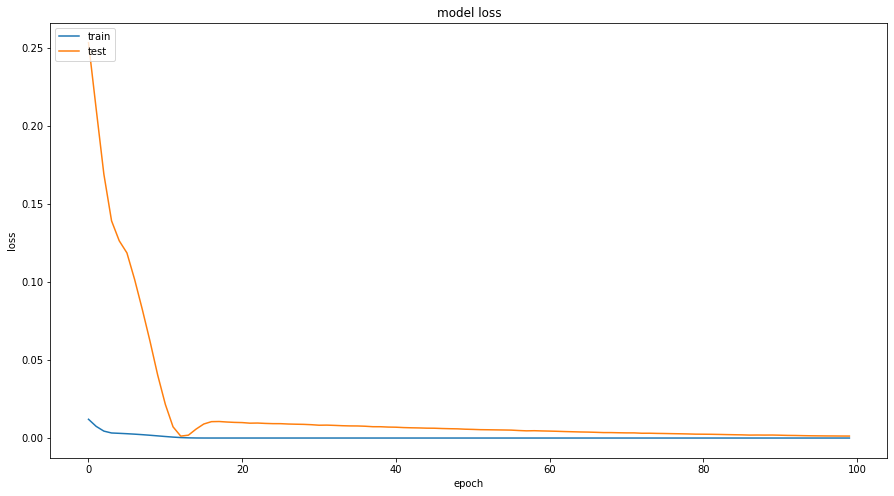

In [169]:
lstm_model1.summary()
plt.plot(lstm_history1.history['mean_squared_error'])
plt.plot(lstm_history1.history['val_mean_squared_error'])
plt.title('model mean squared error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(lstm_history1.history['loss'])
plt.plot(lstm_history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [170]:
import math
def model_score(lstm_model1, X_train, y_train, X_test, y_test):
    trainScore = lstm_model1.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    testScore = lstm_model1.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

model_score(lstm_model1, X_train, y_train , X_test, y_test)

Train Score: 0.00001 MSE (0.00 RMSE)
Test Score: 0.00127 MSE (0.04 RMSE)


(1.1696950423356611e-05, 0.0012718369252979755)

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


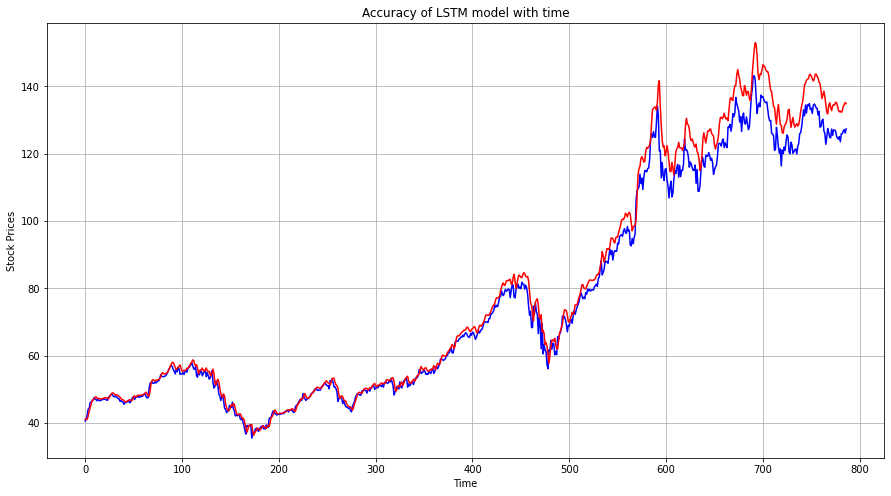

In [171]:
pred = lstm_model1.predict(X_test)
pred = scaler.inverse_transform(pred)
testY = y_test.reshape(y_test.shape[0] , 1)
testY = scaler.inverse_transform(testY)
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,8)
plt.plot(testY , 'b')
plt.plot(pred , 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Accuracy of LSTM model with time')
plt.grid(True)
#plt.legend()
plt.show()

In [174]:
#build model
lstm_model3 = Sequential()
lstm_model3.add(LSTM(units=50, input_shape = (1 , n_features), return_sequences=False))
lstm_model3.add(Activation('tanh'))
lstm_model3.add(Dropout(0.2))
lstm_model3.add(Dense(1))
lstm_model3.add(LeakyReLU())
lstm_model3.compile(loss = 'mean_squared_error', optimizer=Adam(learning_rate = 0.0005) , metrics = ['mean_squared_error'])
lstm_history3 =lstm_model3.fit(X_train,y_train,validation_data = (X_test,y_test), epochs = 100,
                   batch_size=128,verbose=1)

Epoch 1/100
15/15 [==============================] - 24s 364ms/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.2590 - val_mean_squared_error: 0.2590
Epoch 2/100
15/15 [==============================] - 0s 31ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.2147 - val_mean_squared_error: 0.2147
Epoch 3/100
15/15 [==============================] - 1s 36ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.1786 - val_mean_squared_error: 0.1786
Epoch 4/100
15/15 [==============================] - 1s 34ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.1524 - val_mean_squared_error: 0.1524
Epoch 5/100
15/15 [==============================] - 1s 37ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.1359 - val_mean_squared_error: 0.1359
Epoch 6/100
15/15 [==============================] - 1s 46ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.1252 - val_mean_squared_error: 0.1252
Epoch 7/100
15/15 [=======

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 50)                10600     
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1)                 0         
Total params: 10,651
Trainable params: 10,651
Non-trainable params: 0
_________________________________________________________________


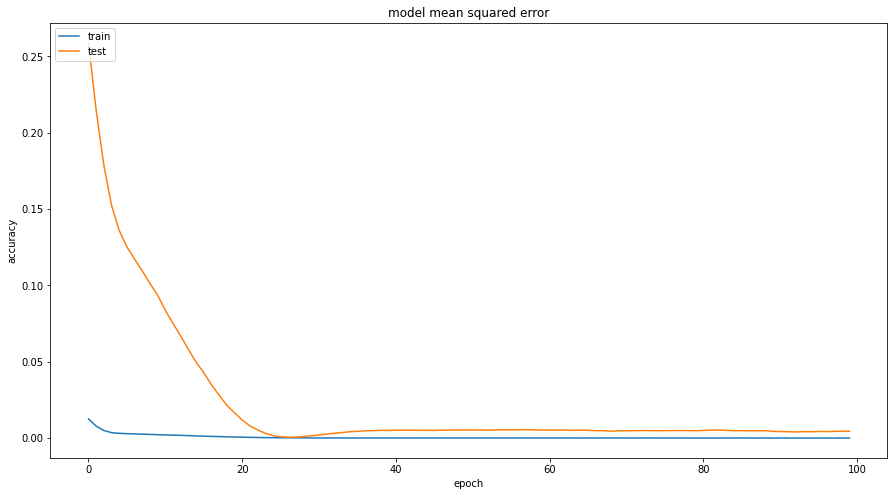

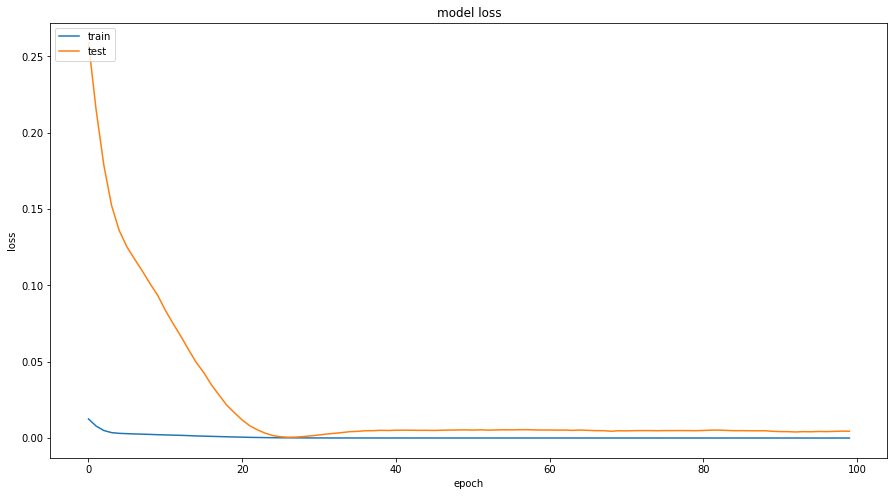

In [175]:
#Model Summary 
lstm_model3.summary()
plt.plot(lstm_history3.history['mean_squared_error'])
plt.plot(lstm_history3.history['val_mean_squared_error'])
plt.title('model mean squared error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(lstm_history3.history['loss'])
plt.plot(lstm_history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [176]:
def model_score(lstm_model3, X_train, y_train, X_test, y_test):
    trainScore = lstm_model3.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    testScore = lstm_model3.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

model_score(lstm_model3, X_train, y_train , X_test, y_test)

Train Score: 0.00001 MSE (0.00 RMSE)
Test Score: 0.00451 MSE (0.07 RMSE)


(1.2228193554619793e-05, 0.004511343315243721)

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


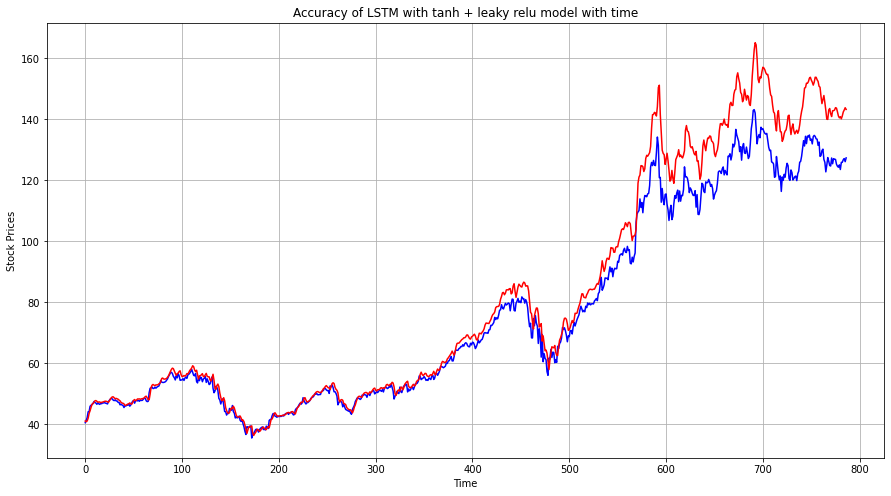

In [205]:
pred = lstm_model3.predict(X_test)
pred = scaler.inverse_transform(pred)
testY = y_test.reshape(y_test.shape[0] , 1)
testY = scaler.inverse_transform(testY)
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,8)
plt.plot(testY , 'b')
plt.plot(pred , 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Accuracy of LSTM with tanh + leaky relu model with time')
plt.grid(True)
plt.show()

<h3>Baseline neural network, 2 (dense) layers</h3>

In [177]:
GRU_model1 = Sequential()
GRU_model1.add(GRU(50, input_shape = (1, n_features), return_sequences = True))
GRU_model1.add(GRU(50))
GRU_model1.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['accuracy'])
GRU_model1.compile(loss='mean_squared_error', optimizer=Adam(learning_rate = 0.0005) , metrics = ['mean_squared_error'])

GRU_history1 =GRU_model1.fit(X_train,y_train,validation_data = (X_test,y_test), epochs = 100,
                   batch_size=128,verbose=1)

Epoch 1/100
15/15 [==============================] - 35s 429ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.1768 - val_mean_squared_error: 0.1768
Epoch 2/100
15/15 [==============================] - 0s 26ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.1183 - val_mean_squared_error: 0.1183
Epoch 3/100
15/15 [==============================] - 0s 27ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.1154 - val_mean_squared_error: 0.1154
Epoch 4/100
15/15 [==============================] - 0s 28ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0872 - val_mean_squared_error: 0.0872
Epoch 5/100
15/15 [==============================] - 0s 26ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0552 - val_mean_squared_error: 0.0552
Epoch 6/100
15/15 [==============================] - 0s 26ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 7/100
15/15 [=======

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 1, 50)             8100      
_________________________________________________________________
gru_2 (GRU)                  (None, 50)                15300     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 23,451
Trainable params: 23,451
Non-trainable params: 0
_________________________________________________________________


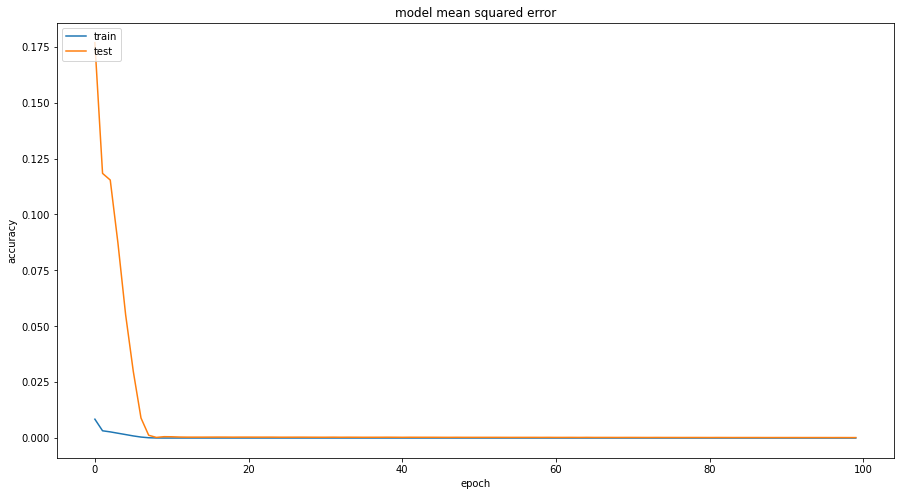

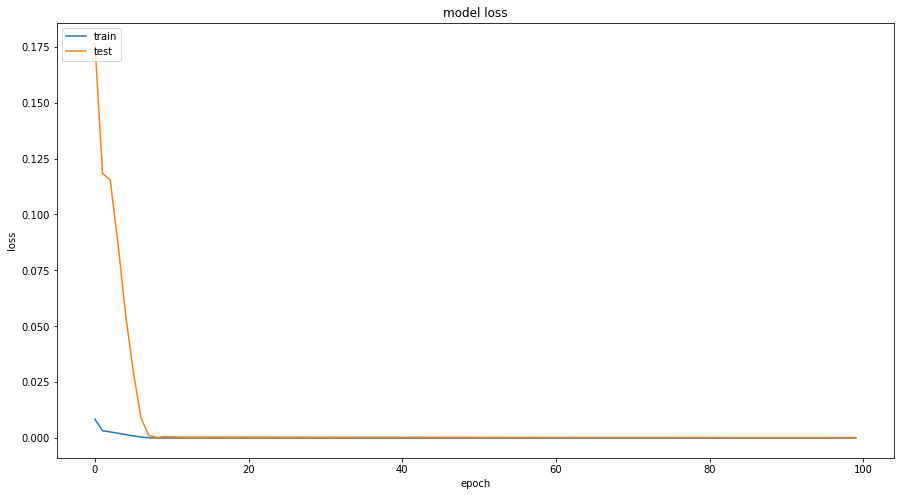

In [178]:
GRU_model1.summary()
plt.plot(GRU_history1.history['mean_squared_error'])
plt.plot(GRU_history1.history['val_mean_squared_error'])
plt.title('model mean squared error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(GRU_history1.history['loss'])
plt.plot(GRU_history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [191]:
def model_score(GRU_model1, X_train, y_train, X_test, y_test):
    trainScore = GRU_model1.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    testScore = GRU_model1.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

model_score(GRU_model1, X_train, y_train , X_test, y_test)

Train Score: 0.00001 MSE (0.00 RMSE)
Test Score: 0.00022 MSE (0.01 RMSE)


(1.238757340615848e-05, 0.0002157004055334255)

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


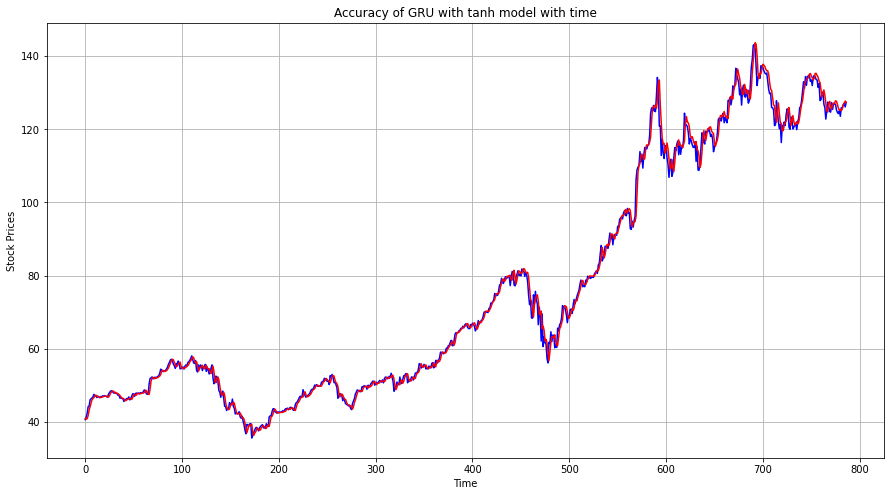

In [204]:
pred = GRU_model1.predict(X_test)
pred = scaler.inverse_transform(pred)
testY = y_test.reshape(y_test.shape[0] , 1)
testY = scaler.inverse_transform(testY)
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,8)
plt.plot(testY , 'b')
plt.plot(pred , 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Accuracy of GRU with tanh model with time')
plt.grid(True)
plt.show()

In [181]:
#build model
GRU_model3 = Sequential()
GRU_model3.add(GRU(units=50, input_shape = (1, n_features), return_sequences=False))
GRU_model3.add(Activation('tanh'))
GRU_model3.add(Dropout(0.2))
GRU_model3.add(Dense(1))
GRU_model3.add(LeakyReLU())
GRU_model3.compile(loss = 'mean_squared_error', optimizer=Adam(learning_rate = 0.0005) , metrics = ['mean_squared_error'])
GRU_history3 =GRU_model3.fit(X_train,y_train,validation_data = (X_test,y_test), epochs = 100,
                   batch_size=128,verbose=1)

Epoch 1/100
15/15 [==============================] - 26s 412ms/step - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.2695 - val_mean_squared_error: 0.2695
Epoch 2/100
15/15 [==============================] - 1s 36ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.1872 - val_mean_squared_error: 0.1872
Epoch 3/100
15/15 [==============================] - 1s 42ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.1579 - val_mean_squared_error: 0.1579
Epoch 4/100
15/15 [==============================] - 1s 41ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.1486 - val_mean_squared_error: 0.1486
Epoch 5/100
15/15 [==============================] - 0s 23ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.1328 - val_mean_squared_error: 0.1328
Epoch 6/100
15/15 [==============================] - 0s 22ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.1136 - val_mean_squared_error: 0.1136
Epoch 7/100
15/15 [=======

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 50)                8100      
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1)                 0         
Total params: 8,151
Trainable params: 8,151
Non-trainable params: 0
_________________________________________________________________


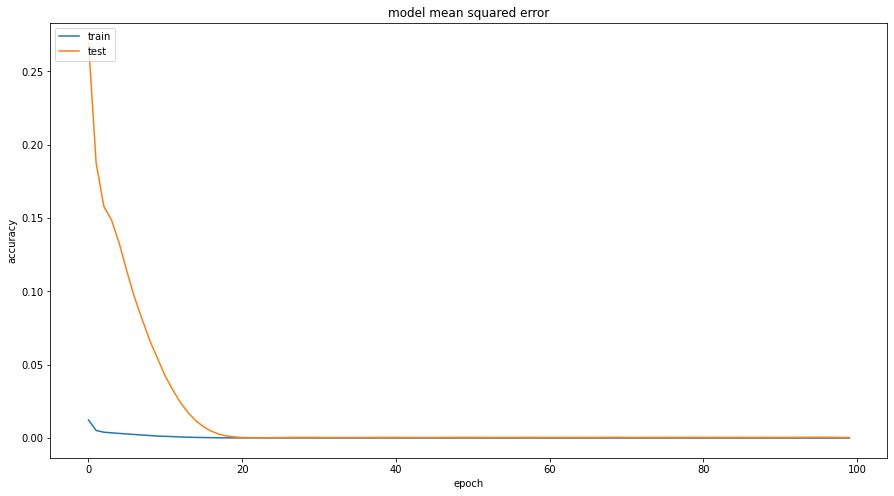

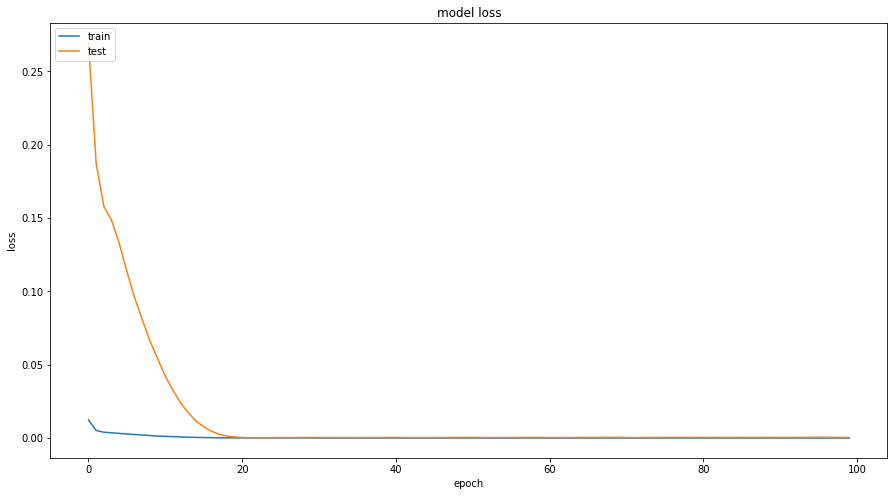

In [182]:
GRU_model3.summary()
plt.plot(GRU_history3.history['mean_squared_error'])
plt.plot(GRU_history3.history['val_mean_squared_error'])
plt.title('model mean squared error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(GRU_history3.history['loss'])
plt.plot(GRU_history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [195]:
def model_score(GRU_model3, X_train, y_train, X_test, y_test):
    trainScore = GRU_model3.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    testScore = GRU_model3.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

model_score(GRU_model3, X_train, y_train , X_test, y_test)

Train Score: 0.00001 MSE (0.00 RMSE)
Test Score: 0.00044 MSE (0.02 RMSE)


(1.1135442946397234e-05, 0.0004372877592686564)

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


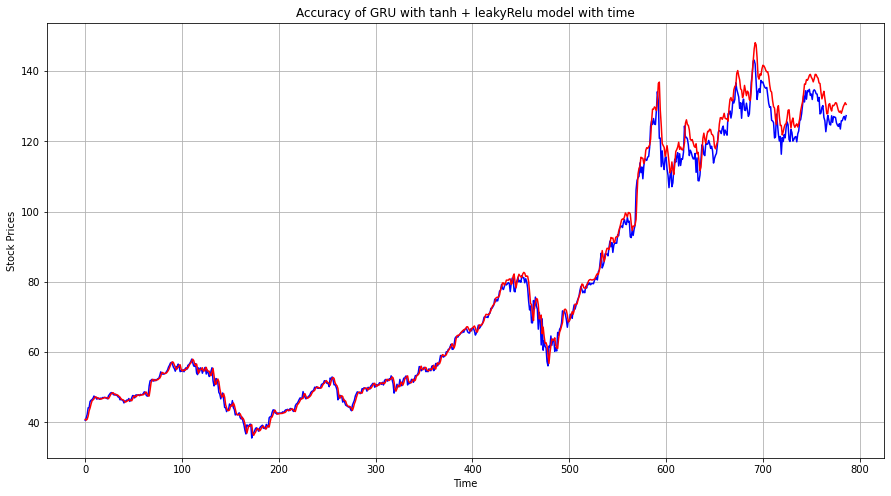

In [203]:
pred = GRU_model3.predict(X_test)
pred = scaler.inverse_transform(pred)
testY = y_test.reshape(y_test.shape[0] , 1)
testY = scaler.inverse_transform(testY)
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,8)
plt.plot(testY , 'b')
plt.plot(pred , 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Accuracy of GRU with tanh + leakyRelu model with time')
plt.grid(True)
#plt.legend()
plt.show()

In [183]:
regress = Sequential()
regress.add(GRU(256 , input_shape = (1 , n_features) , return_sequences=True))
regress.add(Dropout(0.4))
regress.add(LSTM(256))
regress.add(Dropout(0.4))
regress.add(Dense(64 ,  activation = 'relu'))
regress.add(Dense(1))
print(regress.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 1, 256)            199680    
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 256)               525312    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 741,505
Trainable params: 741,505
Non-trainable params: 0
________________________________________________

In [184]:
regress.compile(loss='mean_squared_error', optimizer=Adam(learning_rate = 0.0005) , metrics = ['mean_squared_error'])
regress_history = regress.fit(X_train, y_train, epochs=100 , batch_size = 128 , 
          callbacks = [checkpoint , lr_reduce] , validation_data = (X_test,y_test))

Epoch 1/100
15/15 [==============================] - 57s 789ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0916 - val_mean_squared_error: 0.0916

Epoch 00001: val_loss improved from -inf to 0.09164, saving model to stock_weights.hdf5
Epoch 2/100
15/15 [==============================] - 3s 177ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0828 - val_mean_squared_error: 0.0828

Epoch 00002: val_loss did not improve from 0.09164
Epoch 3/100
15/15 [==============================] - 2s 149ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0139 - val_mean_squared_error: 0.0139

Epoch 00003: val_loss did not improve from 0.09164
Epoch 4/100
15/15 [==============================] - 3s 206ms/step - loss: 2.9662e-04 - mean_squared_error: 2.9662e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012

Epoch 00004: val_loss did not improve from 0.09164
Epoch 5/100
15/15 [==============================] - 3s 205ms/step - loss: 1.3077e-04 - mean_s

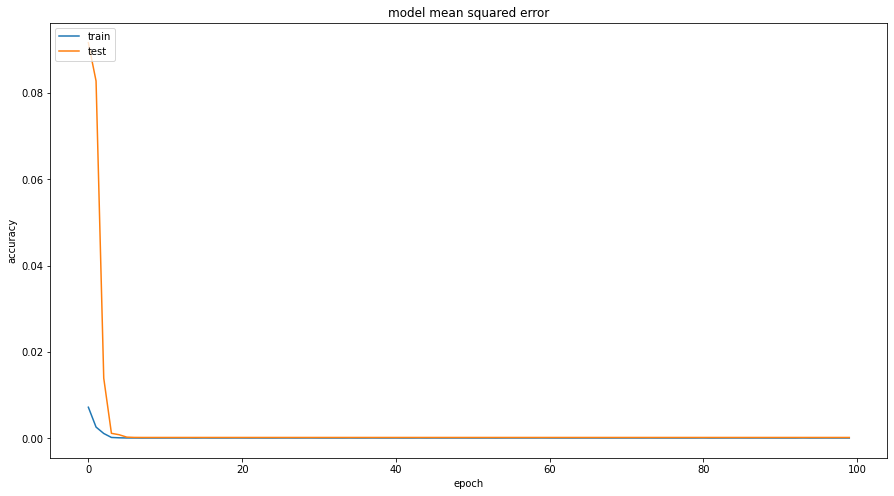

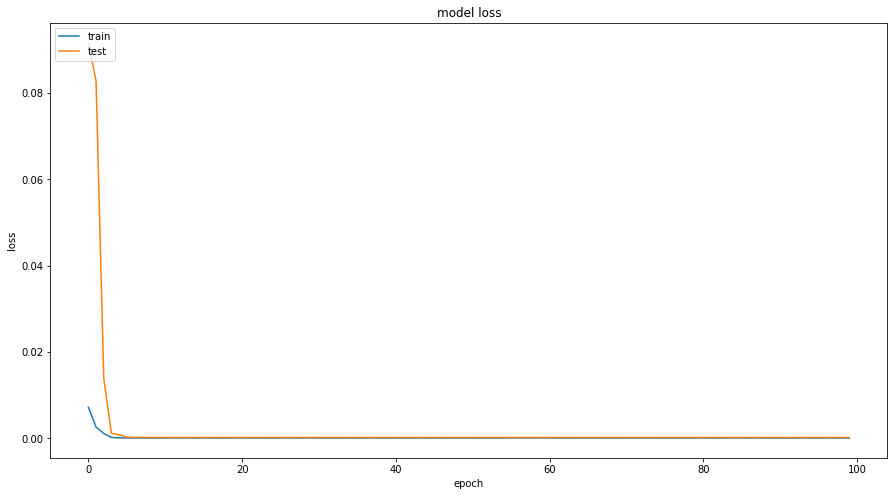

In [185]:
plt.plot(regress_history.history['mean_squared_error'])
plt.plot(regress_history.history['val_mean_squared_error'])
plt.title('model mean squared error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(regress_history.history['loss'])
plt.plot(regress_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [186]:
def model_score(regress, X_train, y_train, X_test, y_test):
    trainScore = regress.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    testScore = regress.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

model_score(regress, X_train, y_train , X_test, y_test)

Train Score: 0.00001 MSE (0.00 RMSE)
Test Score: 0.00021 MSE (0.01 RMSE)


(1.1953066859859973e-05, 0.0002147027844330296)

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


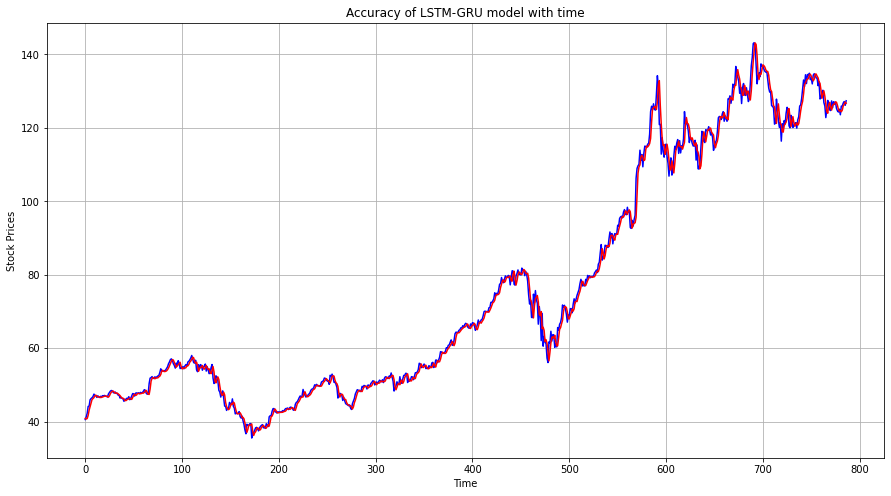

In [202]:
pred = regress.predict(X_test)
pred = scaler.inverse_transform(pred)
testY = y_test.reshape(y_test.shape[0] , 1)
testY = scaler.inverse_transform(testY)
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,8)
plt.plot(testY , 'b')
plt.plot(pred , 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Accuracy of LSTM-GRU model with time')
plt.grid(True)
#plt.legend()
plt.show()